<a href="https://colab.research.google.com/github/marlcin2004-dev/Biomass_deterministic_modeling/blob/main/notebooks/patterns_Mod_Det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Klonujemy repo
!git clone https://github.com/marlcin2004-dev/Biomass_deterministic_modeling.git
%cd Biomass_deterministic_modeling
import sys
sys.path.append("./pipeline")

Cloning into 'Biomass_deterministic_modeling'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 84 (delta 27), reused 44 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 1.14 MiB | 19.75 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/Biomass_deterministic_modeling


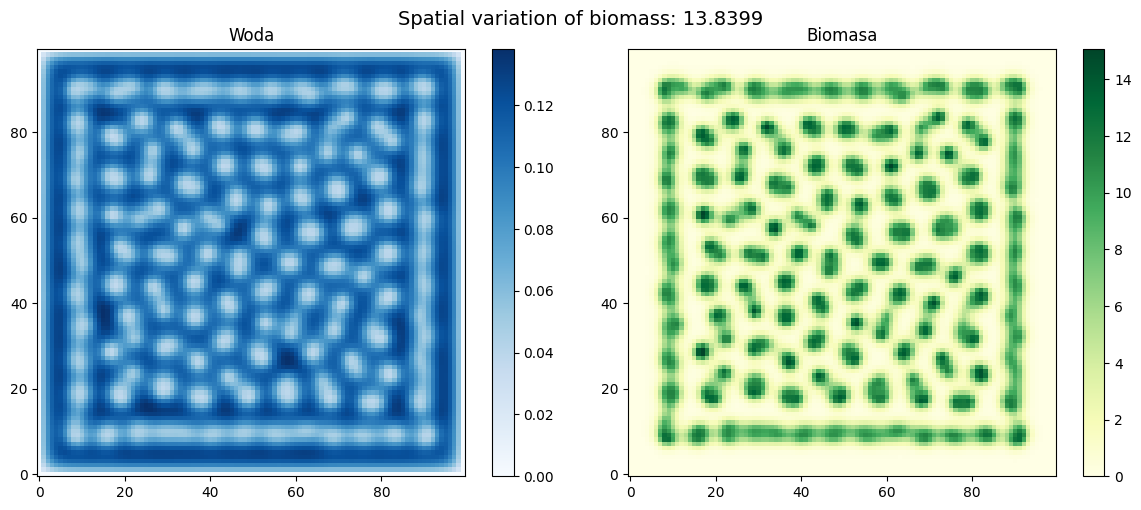

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Klausmeier import KlausmeierModel

# LABIRYNT
Nx, Ny = 100, 100
u = 2.0*np.ones(Nx * Ny)
v = 2.0*np.ones(Nx*Ny) + 0.05 * np.random.randn(Nx * Ny)

params = dict(
    a = 2.0,
    d1=182.5,
    d2=0.25,
    m=0.45,
    Lx=100, Ly=100,
    Nx=Nx, Ny=Ny
)

model = KlausmeierModel( **params)

# ---- WARUNKI POCZĄTKOWE ----
u0 = 2.0 * np.ones(Nx * Ny)
v0 = 2.0 * np.ones(Nx * Ny) + 0.05 * np.random.randn(Nx * Ny)
u0[model.boundary] = 0.0
v0[model.boundary] = 0.0

model.u = u0
model.v = v0

# ---- Symulacja ----

u, v = model.run()

# ---- Różnorodność Patternów ----
_, _, variation_of_patterns = model.biomass_stats()

# ---- Wykres ----
fig, axs = plt.subplots(1, 2, figsize=(12,5))

fig.suptitle(
    f"Spatial variation of biomass: {variation_of_patterns:.4f}",
    fontsize=14
)

im1 = axs[0].imshow(u, origin="lower", cmap="Blues")
axs[0].set_title("Woda")
plt.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(v, origin="lower", cmap="YlGn")
axs[1].set_title("Biomasa")
plt.colorbar(im2, ax=axs[1])

plt.tight_layout()
plt.show()

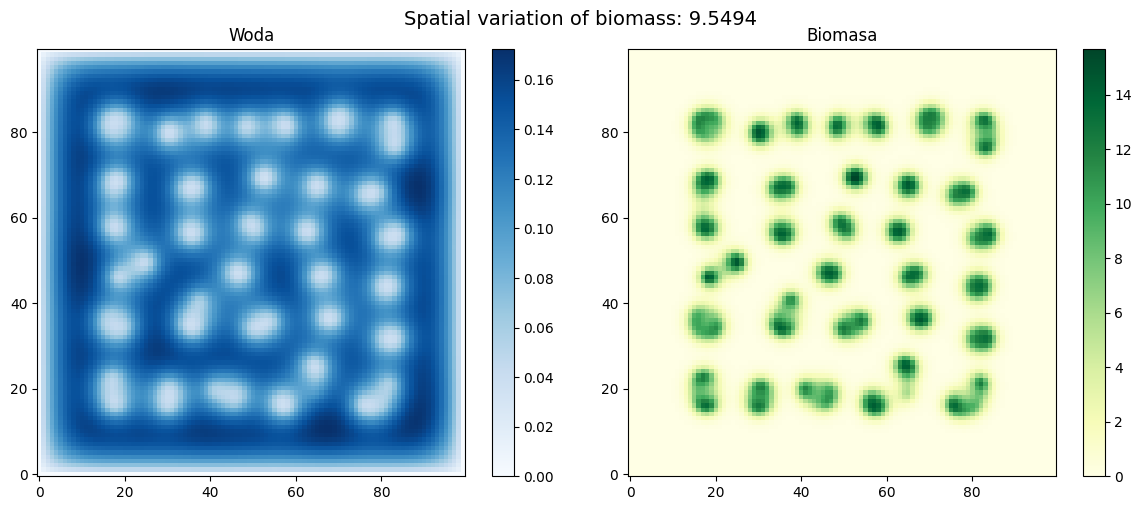

In [3]:
# DOTS
Nx, Ny = 100, 100
u = 2.0 * np.ones(Nx * Ny)
v = 2.0 * np.ones(Nx * Ny) + 0.2*np.random.randn(Nx*Ny)

params = dict(
    a = 1.2,
    d1=80,
    d2=0.1,
    m=0.45,
    Lx=50, Ly=50,
    Nx=Nx, Ny=Ny
)

model = KlausmeierModel( **params)

# ---- WARUNKI POCZĄTKOWE ----
u0 = 2.0 * np.ones(Nx * Ny)
v0 = 2.0 * np.ones(Nx * Ny) + 0.05 * np.random.randn(Nx * Ny)
u0[model.boundary] = 0.0
v0[model.boundary] = 0.0

model.u = u0
model.v = v0

# ---- Symulacja ----

u, v = model.run()

# ---- Różnorodność Patternów ----
_, _, variation_of_patterns = model.biomass_stats()

# ---- Wykres ----
fig, axs = plt.subplots(1, 2, figsize=(12,5))

fig.suptitle(
    f"Spatial variation of biomass: {variation_of_patterns:.4f}",
    fontsize=14
)

im1 = axs[0].imshow(u, origin="lower", cmap="Blues")
axs[0].set_title("Woda")
plt.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(v, origin="lower", cmap="YlGn")
axs[1].set_title("Biomasa")
plt.colorbar(im2, ax=axs[1])

plt.tight_layout()
plt.show()